In [6]:
import os
from pathlib import Path
import cv2 as cv 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [3]:
# make paths
current_path = os.getcwd()
train_path = Path( os.path.join(( os.path.dirname(os.path.dirname(current_path)) ), "Research", "data", "train") )
test_path = Path( os.path.join(( os.path.dirname(os.path.dirname(current_path)) ), "Research", "data", "test") )
valid_path = Path( os.path.join(( os.path.dirname(os.path.dirname(current_path)) ), "Research", "data", "valid") )

In [5]:
# check the number of classes (i.e., number of species) in train, test and validation datasets
number_of_classes = len(os.listdir(train_path))
print(number_of_classes)
number_of_classes = len(os.listdir(test_path))
print(number_of_classes)
number_of_classes = len(os.listdir(valid_path))
print(number_of_classes)

524
524
524


In [6]:
# prepare for visualizing the images
image_files = [f for bird_species in train_path.iterdir() for f in bird_species.glob('*.jpg')]
image_df = pd.DataFrame({
    'Filepath': image_files,
    'Label': [f.parent.name for f in image_files]  # using the parent folder name as label
})

In [7]:
# read in the CSV file
birds_df = pd.read_csv(os.path.join(os.path.dirname(train_path), "birds.csv"))
labels_to_scientific_name = dict(zip(birds_df['labels'], birds_df['scientific name']))

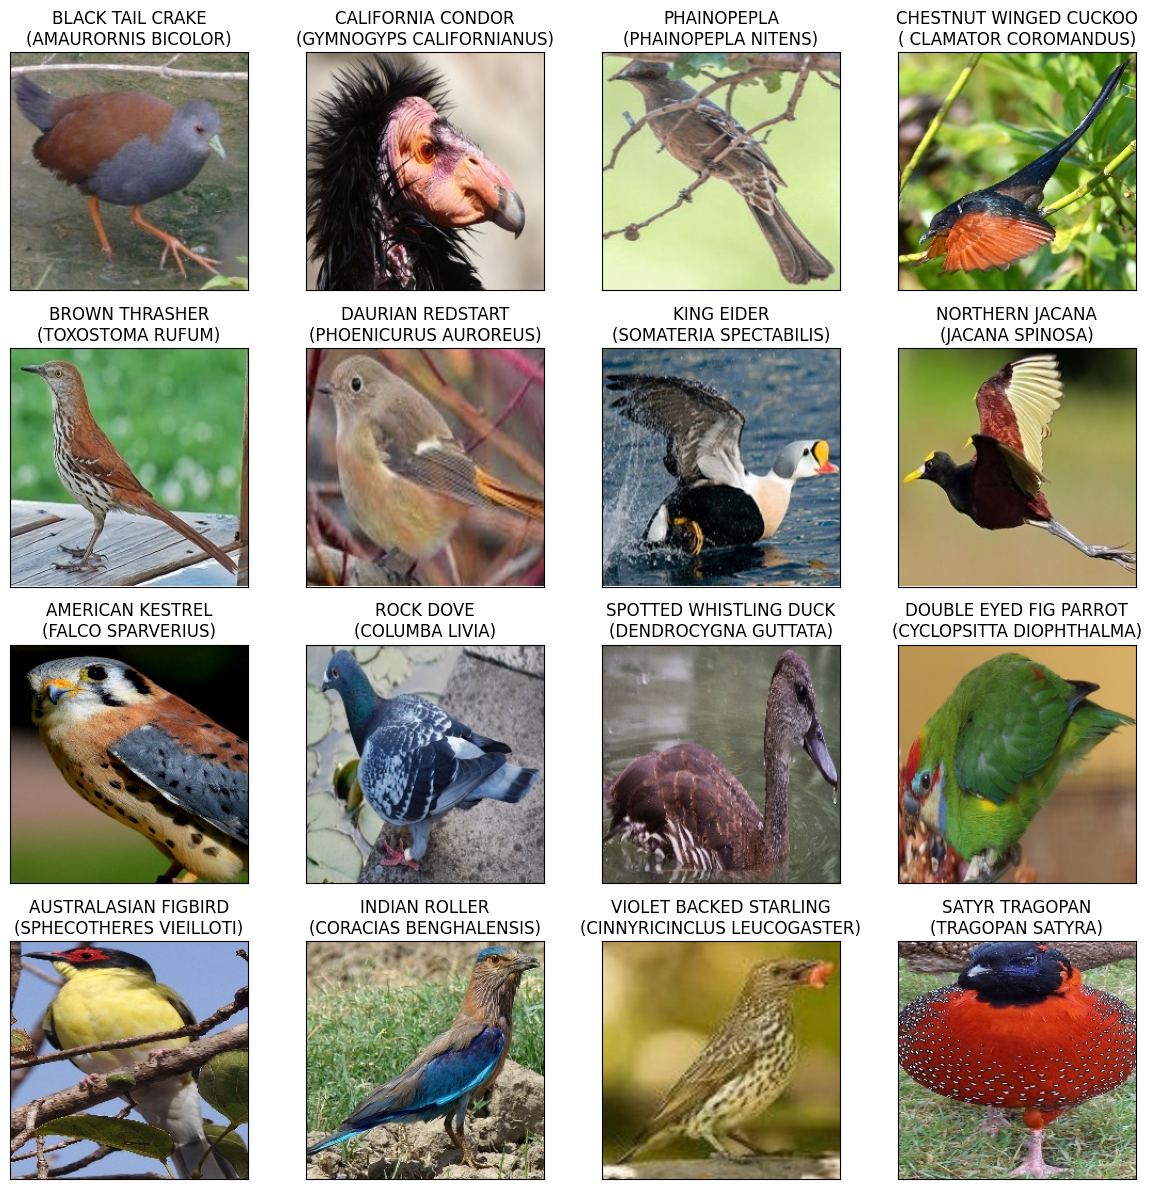

In [8]:
# visualize 16 random images
random_index = np.random.randint(0, len(image_df), 16)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(12, 12),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath.iloc[random_index[i]]))
    
    # fetch the scientific name using the label and the created dictionary
    label = image_df.Label.iloc[random_index[i]]
    scientific_name = labels_to_scientific_name.get(label, "Unknown")    
    ax.set_title(f"{label}\n({scientific_name})")  # display both common and scientific names
    
plt.tight_layout()
plt.show()

In [9]:
DataGenerator = ImageDataGenerator(rescale=1./255)

In [10]:
train_data = DataGenerator.flow_from_directory(train_path, target_size=(224,224),batch_size=32,class_mode='categorical')
test_data = DataGenerator.flow_from_directory(test_path, target_size=(224,224),batch_size=32,class_mode='categorical')
valid_data = DataGenerator.flow_from_directory(valid_path, target_size=(224,224),batch_size=32,class_mode='categorical')

Found 84479 images belonging to 524 classes.
Found 2620 images belonging to 524 classes.
Found 2620 images belonging to 524 classes.


In [ ]:
# base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top= False,)
# base_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))

### Config the base model

In [12]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet')
base_model.trainable = False
inputs = tf.keras.layers.Input(shape=(224,224,3), name="input-layer")
X = base_model(inputs)
X = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(X)
outputs = tf.keras.layers.Dense(524, activation="softmax", name="output-layer")(X)
model_0 = tf.keras.Model(inputs, outputs)

In [ ]:
# base_model.trainable = False

In [ ]:
# inputs = tf.keras.layers.Input(shape =(224,224,3), name = "input-layer")

In [ ]:
# X = base_model(inputs)
# print(f"Shape after passing inputs through base model: {X.shape}")

In [ ]:
# X = tf.keras.layers.GlobalAveragePooling2D(name = "global_average_pooling_layer")(X)
# print(f"Shape after GlobalAveragePooling2D: {X.shape}")

In [ ]:
# outputs = tf.keras.layers.Dense(524, activation = "softmax", name = "output-layer")(X)

In [ ]:
# model_0 = tf.keras.Model(inputs, outputs)

In [13]:
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics = ["accuracy"])

In [17]:
model_0.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048   21802784  
                             )                                   
                                                                 
 global_average_pooling_lay  (None, 2048)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 output-layer (Dense)        (None, 524)               1073676   
                                                                 
Total params: 22876460 (87.27 MB)
Trainable params: 1073676 (4.10 MB)
Non-trainable params: 21802784 (83.17 MB)
_____________

In [14]:
history = model_0.fit(train_data,
                      epochs=10,
                      steps_per_epoch = len(train_data),
                      validation_data = valid_data,
                      validation_steps = int(0.25*len(valid_data)),)

Epoch 1/10


2023-09-12 01:11:35.008191: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-12 01:11:35.678136: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-12 01:11:37.755367: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0ae0464da0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-12 01:11:37.755408: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 2060, Compute Capability 7.5
2023-09-12 01:11:37.759893: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-12 01:11:37.869366: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-09-12 01:11:37.911994: I ./tensorflow/compiler/jit/device_comp

2640/2640 [==============================] - 169s 62ms/step - loss: 10.6293 - accuracy: 0.4775 - val_loss: 7.2784 - val_accuracy: 0.6297
Epoch 2/10
2640/2640 [==============================] - 167s 63ms/step - loss: 7.7259 - accuracy: 0.6681 - val_loss: 7.2160 - val_accuracy: 0.7188
Epoch 3/10
2640/2640 [==============================] - 166s 63ms/step - loss: 6.5184 - accuracy: 0.7338 - val_loss: 6.8634 - val_accuracy: 0.7437
Epoch 4/10
2640/2640 [==============================] - 166s 63ms/step - loss: 5.6177 - accuracy: 0.7721 - val_loss: 7.2620 - val_accuracy: 0.7500
Epoch 5/10
2640/2640 [==============================] - 166s 63ms/step - loss: 4.9081 - accuracy: 0.8041 - val_loss: 7.3801 - val_accuracy: 0.7625
Epoch 6/10
2640/2640 [==============================] - 163s 62ms/step - loss: 4.4057 - accuracy: 0.8216 - val_loss: 7.4328 - val_accuracy: 0.7844
Epoch 7/10
2640/2640 [==============================] - 167s 63ms/step - loss: 3.9935 - accuracy: 0.8405 - val_loss: 6.1248 - va

In [16]:
model_0.evaluate(test_data)

82/82 [==============================] - 7s 82ms/step - loss: 5.2045 - accuracy: 0.8466


[5.204532623291016, 0.8465648889541626]

### Fine tune the model

In [18]:
base_model.trainable = True

# Un-freeze last 10 layers
for layer in base_model.layers[:-10]:
    layer.trainable = False

In [19]:
# Recompile
model_0.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"] )

In [21]:
print(len(model_0.trainable_variables))

3


In [22]:
initial_epochs = 10
fine_tune_epochs = initial_epochs + 1

# Refit the model
history_2 = model_0.fit(train_data,
                        epochs = fine_tune_epochs,
                        validation_data = valid_data,
                        validation_steps = int(0.25*len(valid_data)),
                        initial_epoch =  history.epoch[-1],) # start the epoch where it left before

Epoch 10/11
2640/2640 [==============================] - 165s 61ms/step - loss: 0.5255 - accuracy: 0.9663 - val_loss: 3.4941 - val_accuracy: 0.8750
Epoch 11/11
2640/2640 [==============================] - 164s 62ms/step - loss: 0.2666 - accuracy: 0.9786 - val_loss: 2.3103 - val_accuracy: 0.8875


In [23]:
model_0.evaluate(test_data)

82/82 [==============================] - 5s 62ms/step - loss: 2.4299 - accuracy: 0.9134


[2.42987060546875, 0.9133588075637817]

In [5]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


In [6]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
import sys

sys.path.append("../")  # add parent directory to the system path
from utils_data import *
from utils_model import *
from utils_YOLOv8 import *
from ultralytics import  YOLO

2023-11-14 00:09:16.548557: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-14 00:09:17.209088: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
path_to_image = "../input/data/real_imgs/001.jpg"

detect_model = YOLO("yolov8n.pt")
results = detect_model(path_to_image, show=False, save=False)
bboxes = results[0].boxes.xyxy.cpu().numpy().reshape(-1, 4)
print(bboxes)

if bboxes.size ==0:
    print("true")


image 1/1 /root/WSL-projects/Bird_classification/Research/notebook/../input/data/real_imgs/001.jpg: 640x640 (no detections), 78.3ms
Speed: 5.0ms preprocess, 78.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


[]
true


In [19]:
path_to_chosen_model = ("../models/YOLOv8/test0/train/weights/last.pt")
# model = YOLO("yolov8n-cls.pt")
model = YOLO(path_to_chosen_model)
# Export the model
# model.export(format="onnx")

In [22]:
path_to_image = ("../input/data/test/ALBATROSS/1.jpg")
path_to_chosen_model = ("../models/YOLOv8/test0/train/weights/last.onnx")
model = YOLO(path_to_chosen_model)
results = model(path_to_image)

WARNING ⚠️ Unable to automatically guess model task, assuming 'task=detect'. Explicitly define task for your model, i.e. 'task=detect', 'segment', 'classify', or 'pose'.
Loading ../models/YOLOv8/test0/train/weights/last.onnx for ONNX Runtime inference...



AssertionError: input shape last dimension expected 4 but input shape is torch.Size([524, 1])